In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('BX-Books.csv', error_bad_lines = False, sep = ';', encoding = 'latin-1')
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\subho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
users = pd.read_csv('BX-Users.csv', sep = ';', error_bad_lines = False, encoding = 'latin-1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep = ';', error_bad_lines = False, encoding = 'latin-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


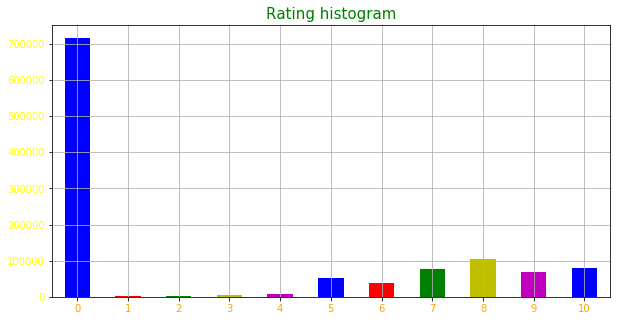

In [32]:
plt.figure(figsize = (10, 5))
plt.title('Rating histogram', fontsize = 15, color = 'green')
ratings['Book-Rating'].value_counts(sort = False).plot(kind = 'bar', color = ['b', 'r', 'g', 'y', 'm'])
plt.xticks(color = 'orange', rotation = 0)
plt.yticks(color = 'yellow')
plt.grid(True)

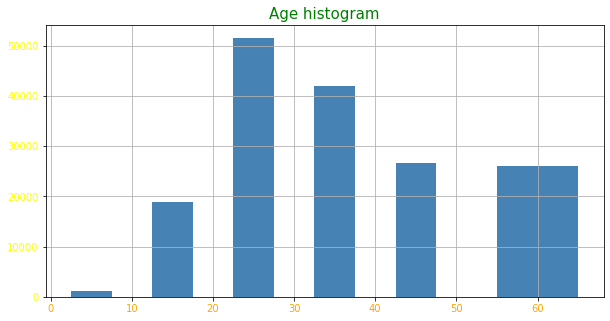

In [48]:
plt.figure(figsize = (10, 5))
plt.title('Age histogram', fontsize = 15, color = 'green')
plt.hist(users['Age'], bins = [0, 10, 20, 30, 40, 50, 70], rwidth = 0.5, color = 'steelblue')
plt.xticks(color = 'orange')
plt.yticks(color = 'yellow')
plt.grid(True)

In [58]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending = False).reset_index().rename(columns = {'Book-Rating': 'rating_count'})
rating_count.head()

,ISBN,rating_count
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723


In [64]:
for i in rating_count['ISBN'][:5]:
    print(books[books['ISBN'] == i][:1]['Book-Title'])

26    Wild Animus
Name: Book-Title, dtype: object
408    The Lovely Bones: A Novel
Name: Book-Title, dtype: object
748    The Da Vinci Code
Name: Book-Title, dtype: object
1105    Divine Secrets of the Ya-Ya Sisterhood: A Novel
Name: Book-Title, dtype: object
522    The Red Tent (Bestselling Backlist)
Name: Book-Title, dtype: object


In [69]:
rating_mean_count = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
rating_mean_count = rating_mean_count.merge(rating_count, on = 'ISBN')
rating_mean_count.sort_values('rating_count', ascending = False).head()

,ISBN,Book-Rating,rating_count
247408,0971880107,1.019584,2502
47371,0316666343,4.468726,1295
83359,0385504209,4.652322,883
9637,0060928336,3.448087,732
41007,0312195516,4.334716,723


In [94]:
count1 = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(count1[count1 >= 200].index)]
count2 = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(count2[count2 >= 100].index)]

In [99]:
ratings_pivot = ratings.pivot_table(index = 'User-ID', columns = 'ISBN', values = 'Book-Rating')
ratings_pivot.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
